In [5]:
#Importing Libraries

import fcsparser as fcsp
import re
import os
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, normalize, LabelEncoder, MinMaxScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV, ParameterGrid, train_test_split, RepeatedStratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error, confusion_matrix
from sklearn.decomposition import PCA


import random

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [24]:
# Importing data

def load_data(dir):
    print('---- loading data ---->')
    data = {}
    for dirname, _, filename in os.walk(dir):
        for file in filename:
            path = os.path.join(dirname, file)
            # Slicing in order to remove .fcs from filename
            f_name = ''.join(list(file)[:-4])
            data[f_name] = pd.DataFrame(fcsp.parse(path, meta_data_only=False, reformat_meta=True)[1])
    return data, fcsp.parse(path, meta_data_only=False, reformat_meta=True)[0]['_channels_']
 

'''
for dirname, _, filename in os.walk(HERE):
    for file in filename:
      path = os.path.join()
        meta = fcsparser.parse(, meta_data_only=True, reformat_meta=True)
'''

def prepData(x,scaler=None):
        """
        Normalize data
        """
        if not scaler:
                scaler = StandardScaler().fit(x)
        x_transformed= np.nan_to_num(np.array(scaler.transform(x)))
        return normalize(x_transformed),scaler

# Loading fcs file data into a dictionary
global path

dir = os.path.abspath(os.path.dirname('C:\\Users\\ankit\\Downloads\\FCM Data\\FCM Data For Kartik - Copy\nc\\IND0_1'))
dir = os.path.join(dir, 'C:\\Users\\ankit\\Downloads\\FCM Data\\FCM Data For Kartik - Copy\\IND 0')
data, channels = load_data(dir)

# Function to return list of different taken samples
def sample_list(det = data):
    return set([sample[0:3] for sample in det.keys()])


# Function to check the dimensions of our fcs files
def checkDimensions(data, dimensions):
    for sample in data:
        if data[sample].shape != dimensions: print(sample, data[sample].shape)
    return 



---- loading data ---->


In [25]:
data

{'IND0_1':             FSC-A  FSC-H        SSC-A      FITC-A        PE-A    PE-Cy5-A  \
 0      650.400024  774.0  1487.969971  116.820000  -51.480000  216.809998   
 1      368.800018  734.0   400.950012  -83.160004  556.380005   20.790001   
 2      204.800003  755.0   427.679993  130.680008 -134.639999    4.950000   
 3      496.800018  910.0   699.929993  347.489990 -103.950005  -15.840000   
 4      237.600006  803.0   467.279999   68.309998 -214.830002    0.990000   
 ...           ...    ...          ...         ...         ...         ...   
 99995  231.199997  780.0   500.940002  -71.279999   10.890000  -35.639999   
 99996  620.000000  759.0   667.260010 -155.430008  675.179993  -32.670002   
 99997  508.800018  848.0   837.539978  146.520004  257.399994  -23.760000   
 99998  199.199997  775.0   418.769989   17.820000 -128.699997  -73.260002   
 99999  324.800018  722.0   723.690002  -44.549999  323.730011  -57.420002   
 
          PE-Cy7-A       APC-A   APC-Cy7-A  Pacific 

In [26]:
checkDimensions(data,data[random.choice(list(data.keys()))].shape)

In [27]:
#concatenating the dataframes of all triplicates -->
def triplicates_combined(data = data):
    deta = {}
    for key in data.keys():
        deta[key[:4]]= pd.concat([data[key[:4]+'_1'],data[key[:4]+'_2'],data[key[:4]+'_3']],axis=0)
    return deta

triplicates_combined()

{'IND0':             FSC-A  FSC-H        SSC-A      FITC-A        PE-A    PE-Cy5-A  \
 0      650.400024  774.0  1487.969971  116.820000  -51.480000  216.809998   
 1      368.800018  734.0   400.950012  -83.160004  556.380005   20.790001   
 2      204.800003  755.0   427.679993  130.680008 -134.639999    4.950000   
 3      496.800018  910.0   699.929993  347.489990 -103.950005  -15.840000   
 4      237.600006  803.0   467.279999   68.309998 -214.830002    0.990000   
 ...           ...    ...          ...         ...         ...         ...   
 99995  251.199997  747.0  1122.660034  248.490005 -555.390015  -65.340004   
 99996  694.400024  959.0   556.380005  -12.870000  330.660004   25.740000   
 99997  615.200012  751.0   943.470032  -45.540001  227.699997  -18.809999   
 99998  156.800003  926.0  2492.820068   -0.990000  811.799988  155.430008   
 99999  468.800018  848.0   604.890015  123.750000 -701.910034   -8.910000   
 
          PE-Cy7-A       APC-A   APC-Cy7-A  Pacific Bl

In [28]:
data.keys()

dict_keys(['IND0_1', 'IND0_2', 'IND0_3'])

In [29]:
Day_1 = dict([(key,data[key]) for key in data.keys() if key.endswith('_1')])
Day_1.keys()

dict_keys(['IND0_1'])

In [30]:
Day_1

{'IND0_1':             FSC-A  FSC-H        SSC-A      FITC-A        PE-A    PE-Cy5-A  \
 0      650.400024  774.0  1487.969971  116.820000  -51.480000  216.809998   
 1      368.800018  734.0   400.950012  -83.160004  556.380005   20.790001   
 2      204.800003  755.0   427.679993  130.680008 -134.639999    4.950000   
 3      496.800018  910.0   699.929993  347.489990 -103.950005  -15.840000   
 4      237.600006  803.0   467.279999   68.309998 -214.830002    0.990000   
 ...           ...    ...          ...         ...         ...         ...   
 99995  231.199997  780.0   500.940002  -71.279999   10.890000  -35.639999   
 99996  620.000000  759.0   667.260010 -155.430008  675.179993  -32.670002   
 99997  508.800018  848.0   837.539978  146.520004  257.399994  -23.760000   
 99998  199.199997  775.0   418.769989   17.820000 -128.699997  -73.260002   
 99999  324.800018  722.0   723.690002  -44.549999  323.730011  -57.420002   
 
          PE-Cy7-A       APC-A   APC-Cy7-A  Pacific 

(300000, 12)


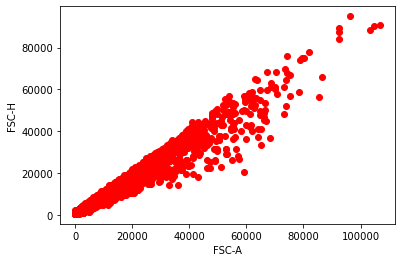

In [56]:
# function to plot combined data for a particular sample

def plot_sample(data, key):
    key = key[:3]
    original = pd.DataFrame()
    for day in range(1):
        l = pd.concat([data[key+str(day)+'_'+str(i)] for i in range(1,4)], axis = 0)
        original = pd.concat([original, l])
    plot = original
    print(plot.shape)
    plt.scatter(plot['FSC-A'],plot['FSC-H'], color = 'red')
    plt.xlabel('FSC-A')
    plt.ylabel('FSC-H')
    plt.show()

plot_sample(data,'IND')

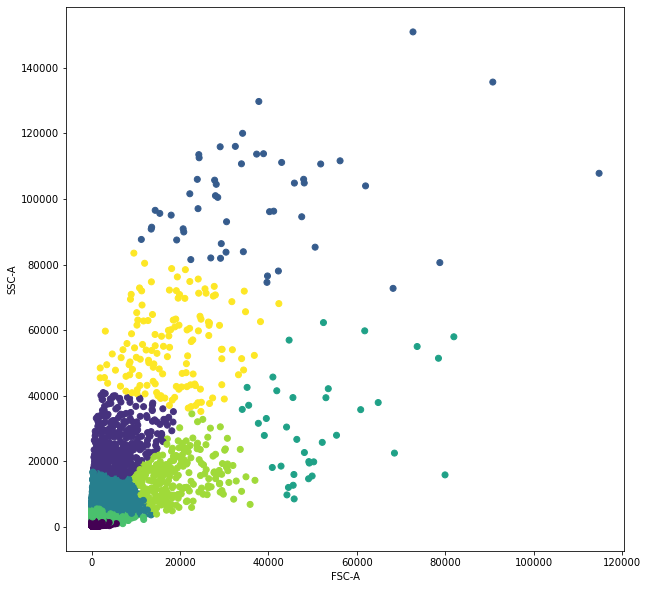

In [23]:
# Running Clustering with feature vector of size 3 in place of 3000 feature vector

num_clusters = 8
cols2 = random.choice(list(data.keys()))
sample = data[cols2][['FSC-A','SSC-A']]
kmean = KMeans(n_clusters = num_clusters).fit(sample)
kmean.predict(sample)
klabels = kmean.labels_

#filter rows of original data

cluster_count1 = np.zeros(num_clusters)
for cluster in range(num_clusters):
    filter_lb = sample[klabels == cluster]


fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)
ax.scatter(sample['FSC-A'],sample['SSC-A'],c = klabels) 
plt.xlabel("FSC-A")
plt.ylabel("SSC-A")

plt.show()


Cluster 1 Inertia 2586158301184.0
Cluster 2 Inertia 952306958336.0
Cluster 3 Inertia 617959063552.0
Cluster 4 Inertia 403295961088.0
Cluster 5 Inertia 298897047552.0
Cluster 6 Inertia 244408664064.0
Cluster 7 Inertia 209936941056.0
Cluster 8 Inertia 181383020544.0
Cluster 9 Inertia 164928176128.0
Cluster 10 Inertia 151958847488.0
Cluster 11 Inertia 139987664896.0
Cluster 12 Inertia 129826938880.0
Cluster 13 Inertia 122202112000.0
Cluster 14 Inertia 113415946240.0
Cluster 15 Inertia 107792588800.0
Cluster 16 Inertia 102885834752.0
Cluster 17 Inertia 97515257856.0
Cluster 18 Inertia 94554120192.0
Cluster 19 Inertia 89883533312.0


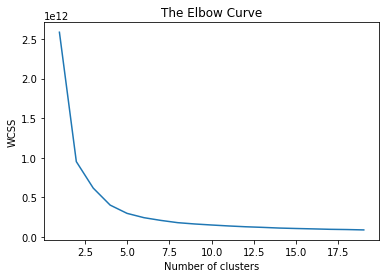

In [45]:
def elbow_curve(sample = sample):
    wcss = []
    for i in range(1,20):
      kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
      kmeans.fit(sample)
      wcss.append(kmeans.inertia_)
      print('Cluster', i, 'Inertia', kmeans.inertia_,)
    plt.plot(range(1,20),wcss)
 
    plt.title('The Elbow Curve')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS') ##WCSS stands for total within-cluster sum of square
    plt.show()

elbow_curve()

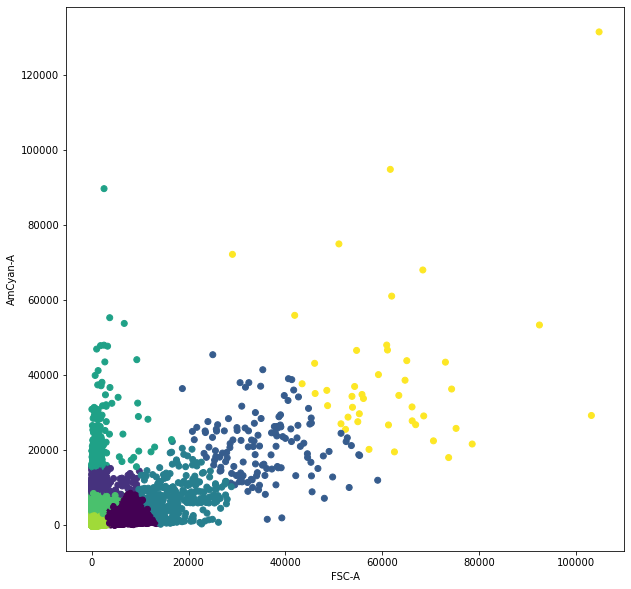

In [46]:
num_clusters = 8
cols2 = random.choice(list(data.keys()))
sample = data[cols2][['FSC-A','AmCyan-A']]
kmean = KMeans(n_clusters = num_clusters).fit(sample)
kmean.predict(sample)
klabels = kmean.labels_

#filter rows of original data

cluster_count1 = np.zeros(num_clusters)
for cluster in range(num_clusters):
    filter_lb = sample[klabels == cluster]


fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)
ax.scatter(sample['FSC-A'],sample['AmCyan-A'],c = klabels) 
plt.xlabel("FSC-A")
plt.ylabel("AmCyan-A")
plt.show()

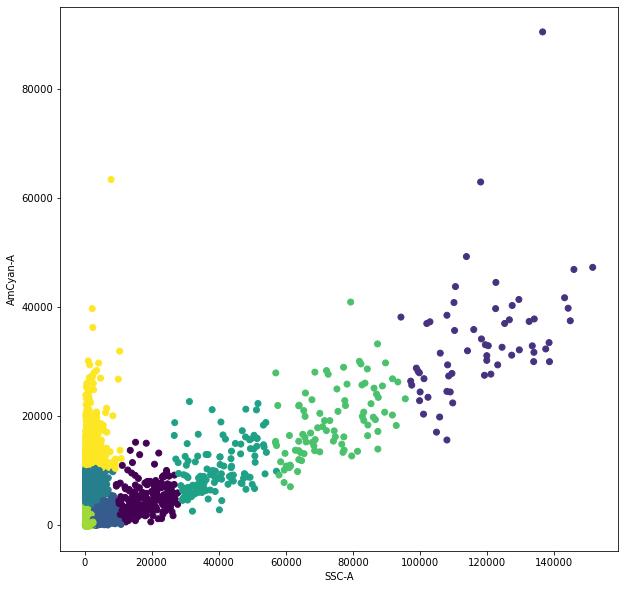

In [47]:
num_clusters = 8
cols2 = random.choice(list(data.keys()))
sample = data[cols2][['SSC-A','AmCyan-A']]
kmean = KMeans(n_clusters = num_clusters).fit(sample)
kmean.predict(sample)
klabels = kmean.labels_

#filter rows of original data

cluster_count1 = np.zeros(num_clusters)
for cluster in range(num_clusters):
    filter_lb = sample[klabels == cluster]


fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)
ax.scatter(sample['SSC-A'],sample['AmCyan-A'],c = klabels) 
plt.xlabel("SSC-A")
plt.ylabel("AmCyan-A")
plt.show()

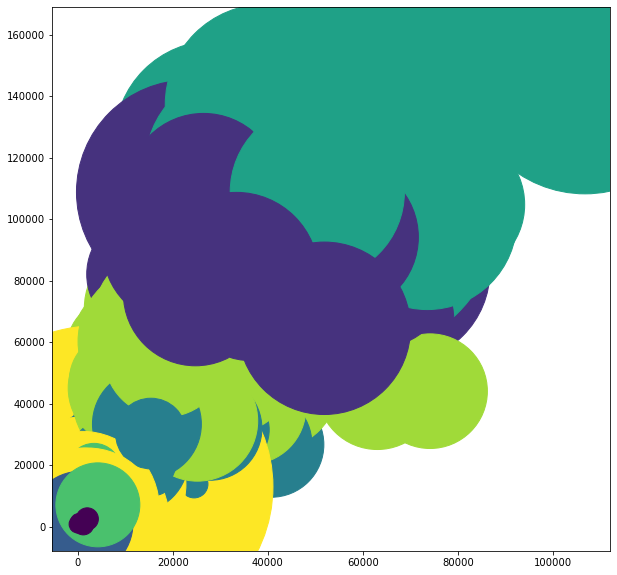

In [48]:
num_clusters = 8
cols2 = random.choice(list(data.keys()))
sample = data[cols2][['FSC-A','SSC-A','AmCyan-A']]
kmean = KMeans(n_clusters = num_clusters).fit(sample)
kmean.predict(sample)
klabels = kmean.labels_

#filter rows of original data

cluster_count1 = np.zeros(num_clusters)
for cluster in range(num_clusters):
    filter_lb = sample[klabels == cluster]


fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, )
ax.scatter(sample['FSC-A'],sample['SSC-A'],sample['AmCyan-A'],c = klabels) 

plt.show()

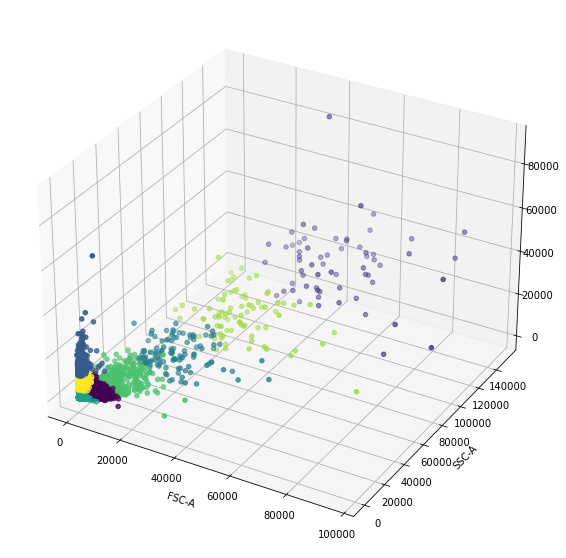

In [49]:
num_clusters = 8
cols2 = random.choice(list(data.keys()))
sample = data[cols2][['FSC-A','SSC-A','AmCyan-A']]
kmean = KMeans(n_clusters = num_clusters).fit(sample)
kmean.predict(sample)
klabels = kmean.labels_

#filter rows of original data

cluster_count1 = np.zeros(num_clusters)
for cluster in range(num_clusters):
    filter_lb = sample[klabels == cluster]


fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d' )
ax.scatter(sample['FSC-A'],sample['SSC-A'],sample['AmCyan-A'],c = klabels) 
plt.xlabel("FSC-A", )
plt.ylabel("SSC-A",)

plt.show()